In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

import scipy.optimize as sco
import scipy.interpolate as sci

from pandas_datareader import data as web

## Group Assignment
### Team Number: 9
### Team Member Names: Germain, Padtmesh, Jin
### Team Strategy Chosen: Safe

In [2]:
def filterData():
    ## Constants
    min_volume = 200000
    min_trading = 20
    min_stockn = 12
    max_stockn= 25


    n=0
    min_weight = 100/(2*n)
    max_weight = 25 
    init_inv = 500000


In [3]:
# def getOptimalPort():


In [4]:
# def createPortFinal():


In [5]:
# def createStocksFinal():


In [6]:
def getHist(tickers):
    # Set defaults for timeframe
    start_date = '2022-01-01'
    end_date = '2022-11-01' # adjustment for non-inclusive param end

    # Create dataframe to hold historic data from tickers
    df_sv = pd.DataFrame()

    # Get the closing price of each ticker and store it as a column in df_sv
    for tick in tickers['Tickers']:
        # Call API for ticker data
        temp = yf.Ticker(tick)

        # Get monthly historical data
        temp_hist = temp.history(start=start_date, end=end_date, interval='1d')

        # Get Closing Price as a DataFrame
        df_sv[tick] = pd.DataFrame(temp_hist['Close'])

    # Remove indeterminate or faulty values
    df_sv.dropna(axis=1,how='all',inplace = True)
    df_sv.dropna(inplace = True)
    return df_sv

In [7]:
# Read in csv file containing tickers
tickers = pd.read_csv('Tickers.csv', names = ['Tickers'])
tickers.head()

,Tickers
0,AAPL
1,ABBV
2,ABT
3,ACN
4,AGN


In [8]:
# Get Historic Data for each ticker
hist = getHist(tickers)
hist.head()

# Filter data



Got error from yahoo api for ticker AGN, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- AGN: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker CELG, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- CELG: No data found for this date range, symbol may be delisted
- PCLN: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker RTN, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- RTN: No data found for this date range, symbol may be delisted
- TWX: No data found for this date range, symbol may be delisted


,AAPL,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,...,SO,SPG,T,TD.TO,TGT,TXN,UNH,UNP,UPS,USB
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,178.663071,130.091568,133.529312,398.858582,57.972286,167.522003,171.387085,213.630005,47.172203,241.729996,...,65.578415,155.815720,18.022526,95.559998,229.317719,185.553360,486.186798,247.933548,210.329269,57.053818
2022-01-05 00:00:00-05:00,173.910660,130.774918,132.929398,391.834412,57.176388,164.356995,169.560776,213.070007,46.376007,239.270004,...,65.655388,153.951431,18.423183,96.137100,224.117737,181.682800,484.988434,248.681198,207.686722,56.752869
2022-01-06 00:00:00-05:00,171.007507,130.158905,132.909729,372.912567,58.158974,163.253998,171.114578,211.339996,47.309818,237.300003,...,65.578415,155.987823,18.352892,96.723839,226.556168,181.624435,465.140808,249.369827,209.700089,58.296444
2022-01-07 00:00:00-05:00,171.176529,129.822067,133.322800,365.760162,59.681973,162.554001,172.579300,215.500000,48.341927,232.600006,...,66.030556,154.180878,18.979885,97.179947,225.997971,174.505737,454.196960,250.638840,211.171417,59.218700
2022-01-10 00:00:00-05:00,171.196426,131.275421,133.027740,367.979858,60.340302,161.485992,171.945923,209.309998,48.096184,235.309998,...,65.924744,153.808029,19.102617,96.782066,222.707565,177.928955,460.535492,246.211990,204.947372,59.568188


In [9]:
# Construct dataframe of percentage change of each stock
hist_pct = hist.pct_change()
hist_pct.head()

,AAPL,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,...,SO,SPG,T,TD.TO,TGT,TXN,UNH,UNP,UPS,USB
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05 00:00:00-05:00,-0.026600,0.005253,-0.004493,-0.017611,-0.013729,-0.018893,-0.010656,-0.002621,-0.016878,-0.010177,...,0.001174,-0.011965,0.022231,0.006039,-0.022676,-0.020860,-0.002465,0.003016,-0.012564,-0.005275
2022-01-06 00:00:00-05:00,-0.016693,-0.004710,-0.000148,-0.048290,0.017185,-0.006711,0.009164,-0.008119,0.020136,-0.008233,...,-0.001172,0.013227,-0.003815,0.006103,0.010880,-0.000321,-0.040924,0.002769,0.009694,0.027198
2022-01-07 00:00:00-05:00,0.000988,-0.002588,0.003108,-0.019180,0.026187,-0.004288,0.008560,0.019684,0.021816,-0.019806,...,0.006895,-0.011584,0.034163,0.004716,-0.002464,-0.039195,-0.023528,0.005089,0.007016,0.015820
2022-01-10 00:00:00-05:00,0.000116,0.011195,-0.002213,0.006069,0.011031,-0.006570,-0.003670,-0.028724,-0.005083,0.011651,...,-0.001602,-0.002418,0.006466,-0.004094,-0.014559,0.019617,0.013955,-0.017662,-0.029474,0.005902


In [10]:
# Random simulation
# alternative could be to iterate completely over the searchspace
# however assuming an upperbound of 1000(even 100) nCr with 25 stocks would be too slow
# instead we could generate random portfolios up to 10^x iterations
# depending on x we can approximate it to a decent degree of accuracy

def getReturns(pct, weights):
    return (np.sum(pct.mean() * weights)) * 253

# May have to pivot to dot function if @ operator isnt supported
def getStd(pct, weights):
    return np.sqrt(np.transpose(weights) @ (pct.cov() * 253) @ weights)

def randSimulation(pct):
    n = 10**4 # possibly 5
    ticker_count = len(pct.columns)
    # print(ticker_count)
    list_return = []
    list_std = []
    list_weight = []
    # Generate n random portfolios
    for p in range(n):
        # Get random values between 0 and 1
        weights = np.random.random(size = ticker_count) 
        list_weight.append(weights)

        # Divide random values by sum to get weights
        weights /= np.sum(weights) 
        list_return.append(getReturns(pct,weights))
        list_std.append(getStd(pct,weights))

    # Convert list to np arrays
    arr_return = np.array(list_return)
    arr_std = np.array(list_std)
    print(round(max(arr_return), 4))
    print(round(min(arr_return), 4))
    print(round(max(arr_std), 4))
    print(round(min(arr_std), 4))
    return arr_return, arr_std, list_weight



def graphSimulation(pct):
    returns, stds, weights = randSimulation(pct)

    maxs_index = np.argmax(returns/stds)
    maxs_std = stds[maxs_index] 
    maxs_return = returns[maxs_index] 
    ms_weight = weights[maxs_index]
    
    minv_index = np.argmin(stds)
    minv_std = stds[minv_index]
    minv_return = returns[minv_index]
    minv_weight = weights[minv_index]

    print(minv_weight)

    plt.figure(figsize=(20, 10))

    plt.scatter(stds,returns, c=(returns/stds), cmap='viridis', s=12, alpha=0.4)

    plt.scatter(maxs_std,maxs_return,c='r' , s=120,marker='D', label='Maximum Sharpe Ratio Portfolio')
    plt.scatter(minv_std,minv_return,c='b', s=120, marker='D',label='Minimum Volatility Portfolio')

    plt.colorbar(label='Sharpe Ratio')

    plt.legend()
    plt.title(' Volatility-Returns from Portfolio Optimization')
    plt.xlabel('Annualized Portfolio Volatility')
    plt.ylabel('Annualized Portfolio Returns')

    #Graph efficient frontier? 

    

0.0011
-0.1958
0.2393
0.1922
[0.04138818 0.00523474 0.01584138 0.0150351  0.00226095 0.00291603
 0.00372044 0.00179505 0.01005221 0.01355764 0.03890146 0.00227921
 0.03941596 0.00682644 0.01345169 0.02513155 0.01198186 0.00821091
 0.03126333 0.04101834 0.03516009 0.03044907 0.02138863 0.002385
 0.03089311 0.0329868  0.00513962 0.02647563 0.02179533 0.02286072
 0.03776008 0.02193809 0.00713977 0.01782688 0.01042313 0.00793982
 0.01586747 0.00441219 0.01940811 0.01814092 0.01329401 0.01782187
 0.00352886 0.01695384 0.03349836 0.01629549 0.01254146 0.02805805
 0.01930996 0.01843238 0.01990823 0.0105999  0.00608606 0.0046259
 0.02833355 0.0265611  0.00347799]


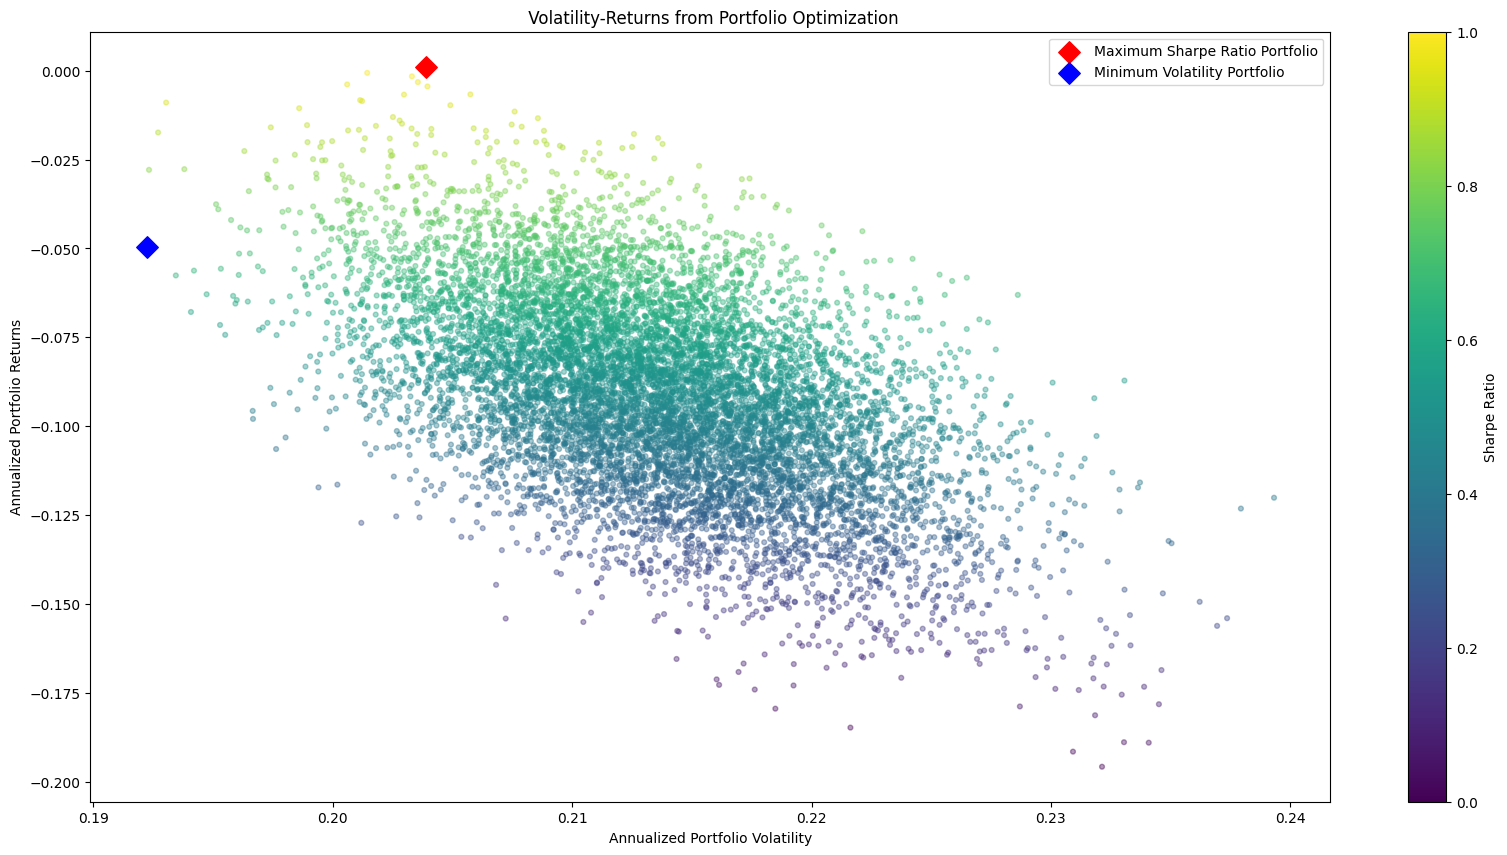

In [11]:

# gen_return, gen_std, gen_weights = randSimulation(daily_returns)
graphSimulation(hist_pct)

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Insert Names Here.